In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
stock_info = pd.read_excel('/Users/lofang/Desktop/python/csv files/1215.tw.xlsx')

In [4]:
stock_info.rename(columns = {'年月':'Date','TEJ產業_名稱':'Industry','應收帳款週轉次數':'Receivable Turnover Ratio','負債比率':'Debt Ratio','單月營收(千元)':'Revenue(k/per Month)','ROA(A)稅後息前':'ROA(Pre-tax)','ROE(A)－稅後':'ROE(After-tax)','公司年資':'Age'}, inplace = True)
stock_info

,公司,Date,Industry,Receivable Turnover Ratio,Debt Ratio,集團控制型態,Revenue(k/per Month),ROA(Pre-tax),ROE(After-tax),Age
0,1215 卜蜂,2019-01-01,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32
1,1215 卜蜂,2019-01-02,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32
2,1215 卜蜂,2019-01-03,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32
3,1215 卜蜂,2019-01-04,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32
4,1215 卜蜂,2019-01-05,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32
...,...,...,...,...,...,...,...,...,...,...
1364,1215 卜蜂,2022-09-26,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35
1365,1215 卜蜂,2022-09-27,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35
1366,1215 卜蜂,2022-09-28,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35
1367,1215 卜蜂,2022-09-29,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35


In [5]:
import yfinance as yf
his_price = yf.download('1225.tw',start = '2019-01-01', end = '2022-09-30')
his_price

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,76.099998,76.099998,75.000000,75.000000,66.416626,3002
2019-01-03,76.900002,76.900002,76.900002,76.900002,68.099174,1013
2019-01-04,76.900002,76.900002,76.900002,76.900002,68.099174,0
2019-01-07,76.900002,76.900002,76.900002,76.900002,68.099174,0
2019-01-08,74.800003,74.800003,74.199997,74.199997,65.708176,10043
...,...,...,...,...,...,...
2022-09-23,51.500000,52.299999,51.500000,52.299999,52.299999,2010
2022-09-26,52.099998,52.299999,51.500000,52.000000,52.000000,20106
2022-09-27,52.000000,52.200001,51.000000,52.200001,52.200001,25487


In [6]:
combined = pd.merge(stock_info,his_price, how = "right", on = ["Date"])
combined['Daily_Return'] = combined['Adj Close'].pct_change().dropna()
combined = combined.drop(index = 0)
#these columns will serve as independent variables in OLS analysis

In [7]:
df1 = pd.read_csv('/Users/lofang/Desktop/python/csv files/ff_table.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
ff_table = df1[(df1.Date.isin(combined.Date))]
ff_table = ff_table.dropna().reset_index(drop=True)
#construct fama french table

In [8]:
ff_table['rf'] = ff_table['rf'] * 0.01

In [9]:
ff_table['mkt-rf'] = ff_table['market'] - ff_table['rf']
ff_table

,Date,market,rf,SMB,HML,mkt-rf
0,2019-01-03,-0.006460,0.00842,0.111343,-0.183098,-0.014880
1,2019-01-04,-0.011579,0.00850,0.283376,-0.465596,-0.020079
2,2019-01-07,0.022147,0.00870,-0.084096,0.457468,0.013447
3,2019-01-08,-0.002784,0.00880,0.068160,-0.082656,-0.011584
4,2019-01-09,0.018268,0.00880,-0.098494,0.406240,0.009468
...,...,...,...,...,...,...
897,2022-09-23,-0.011638,0.01402,0.067400,-0.452997,-0.025658
898,2022-09-26,-0.024096,0.01475,-0.234168,-0.305070,-0.038846
899,2022-09-27,0.003513,0.01665,0.150132,0.116685,-0.013137
900,2022-09-28,-0.026074,0.01675,-0.156746,-0.481711,-0.042824


In [10]:
joint = combined[(combined.Date.isin(ff_table.Date))]
joint = joint.reset_index(drop = True)
joint
#match values between datasets(drop na, drop holidays)

,公司,Date,Industry,Receivable Turnover Ratio,Debt Ratio,集團控制型態,Revenue(k/per Month),ROA(Pre-tax),ROE(After-tax),Age,Open,High,Low,Close,Adj Close,Volume,Daily_Return
0,1215 卜蜂,2019-01-03,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32,76.900002,76.900002,76.900002,76.900002,68.099174,1013,0.025333
1,1215 卜蜂,2019-01-04,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32,76.900002,76.900002,76.900002,76.900002,68.099174,0,0.000000
2,1215 卜蜂,2019-01-07,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32,76.900002,76.900002,76.900002,76.900002,68.099174,0,0.000000
3,1215 卜蜂,2019-01-08,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32,74.800003,74.800003,74.199997,74.199997,65.708176,10043,-0.035111
4,1215 卜蜂,2019-01-09,油脂飼料,8.89,53.71,F,1885469,1.72,3.55,32,74.199997,74.199997,74.199997,74.199997,65.708176,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,1215 卜蜂,2022-09-23,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,51.500000,52.299999,51.500000,52.299999,52.299999,2010,0.015534
898,1215 卜蜂,2022-09-26,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,52.099998,52.299999,51.500000,52.000000,52.000000,20106,-0.005736
899,1215 卜蜂,2022-09-27,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,52.000000,52.200001,51.000000,52.200001,52.200001,25487,0.003846
900,1215 卜蜂,2022-09-28,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,51.000000,51.000000,51.000000,51.000000,51.000000,15004,-0.022989


In [11]:
X = ff_table[['mkt-rf', 'SMB', 'HML']]
y = joint['Daily_Return'] - ff_table['rf']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
intercept, b1, b2, b3 = ff_model.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.138
Method:                 Least Squares   F-statistic:                     49.06
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           2.28e-29
Time:                        13:56:01   Log-Likelihood:                 2323.7
No. Observations:                 902   AIC:                            -4639.
Df Residuals:                     898   BIC:                            -4620.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.001     -0.350      0.7

In [12]:
#collect coefficients from fama french result
def factor(t):
    X = ff_table[['mkt-rf', 'SMB', 'HML']].head(t+120)
    y = joint['Daily_Return'].head(t+120) - ff_table['rf'].head(t+120)
    X = sm.add_constant(X)
    ff_model = sm.OLS(y, X).fit()
    intercept, b1, b2, b3 = ff_model.params
    c = [intercept, b1, b2, b3]
    return c

In [13]:
#collect coefficients from fama french result
coefficient = []
for i in range(0,783,1):
    coefficient.append(factor(i))
c_table = pd.DataFrame(coefficient, columns = ['const ','mkt-rf','SMB','HML'])
c_table.index = c_table.index + 1
c_table

,const,mkt-rf,SMB,HML
1,0.000100,1.182279,0.036856,-0.013940
2,-0.000085,1.166863,0.037363,-0.013699
3,-0.000273,1.160782,0.038253,-0.013594
4,-0.000453,1.162046,0.039378,-0.013079
5,-0.000433,1.171905,0.039313,-0.013607
...,...,...,...,...
779,-0.000338,0.966612,0.010385,-0.022749
780,-0.000357,0.961092,0.010223,-0.022674
781,-0.000361,0.960284,0.010268,-0.022632
782,-0.000352,0.963152,0.010359,-0.022648


In [14]:
def rf(t):
    return ff_table['rf'].loc[t]
def market_premium(t):
    return ff_table['mkt-rf'].loc[t]
def size_premium(t):
    return ff_table['SMB'].loc[t]
def value_premium(t):
    return ff_table['HML'].loc[t]

In [15]:
def get_const(t):
    return c_table['const'].loc[t]
def get_mkt(t):
    return c_table['mkt-rf'].loc[t]
def get_SMB(t):
    return c_table['SMB'].loc[t]
def get_HML(t):
    return c_table['HML'].loc[t]

In [16]:
#calculate expected return from above result
#with 10 day window
def er(t):
    return rf(t-10) + get_mkt(t-10) * market_premium(t-10) + get_SMB(t-10) * size_premium(t-10) + get_HML(t-10) * value_premium(t-10)

In [17]:
expected_daily_return = []
abnormal = []
for i in range(11,784,1):
    a = er(i)
    expected_daily_return.append(a)
er_table = pd.DataFrame (expected_daily_return, columns = ['ER'])
er_table.index = er_table.index + 1
er_table

,ER
1,0.001696
2,0.014981
3,-0.000916
4,0.010611
5,-0.003322
...,...
769,0.002214
770,0.004565
771,-0.002358
772,-0.007997


In [18]:
#modify data size(need to drop the first 130 days)
variable_table = joint.drop(index = joint.index[0:129])
variable_table.index = variable_table.index - 128

In [19]:
variable_table['Abnormal_Return'] = er_table['ER'] - variable_table['Daily_Return']
variable_table

,公司,Date,Industry,Receivable Turnover Ratio,Debt Ratio,集團控制型態,Revenue(k/per Month),ROA(Pre-tax),ROE(After-tax),Age,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Abnormal_Return
1,1215 卜蜂,2019-07-23,油脂飼料,8.62,57.43,F,1745142,5.95,12.84,32,58.599998,58.599998,57.599998,57.599998,51.007965,53003,-0.015385,0.017080
2,1215 卜蜂,2019-07-24,油脂飼料,8.62,57.43,F,1745142,5.95,12.84,32,57.599998,58.000000,56.099998,56.200001,49.768188,102118,-0.024306,0.039287
3,1215 卜蜂,2019-07-25,油脂飼料,8.62,57.43,F,1745142,5.95,12.84,32,56.000000,58.000000,55.500000,57.900002,51.273636,88063,0.030249,-0.031165
4,1215 卜蜂,2019-07-26,油脂飼料,8.62,57.43,F,1745142,5.95,12.84,32,57.099998,58.799999,57.099998,58.700001,51.982075,63465,0.013817,-0.003206
5,1215 卜蜂,2019-07-29,油脂飼料,8.62,57.43,F,1745142,5.95,12.84,32,59.500000,59.500000,57.700001,58.700001,51.982075,86359,0.000000,-0.003322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,1215 卜蜂,2022-09-23,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,51.500000,52.299999,51.500000,52.299999,52.299999,2010,0.015534,-0.013320
770,1215 卜蜂,2022-09-26,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,52.099998,52.299999,51.500000,52.000000,52.000000,20106,-0.005736,0.010301
771,1215 卜蜂,2022-09-27,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,52.000000,52.200001,51.000000,52.200001,52.200001,25487,0.003846,-0.006204
772,1215 卜蜂,2022-09-28,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,51.000000,51.000000,51.000000,51.000000,51.000000,15004,-0.022989,0.014992


In [20]:
# ignore it
def get_index(t):
    return variable_table.index[variable_table['Date']==t].tolist()[0]

In [21]:
# Calculate t days cumulative abnormal return
# Date is the starting day
def car(date, t):
    value = 0
    for i in range(-t, t+1, 1):
        value += variable_table['Abnormal_Return'].loc[date+i]
    return value
car(4,3)


0.041047298220030316

In [22]:
def car_alt(date, t):
    value = []
    for i in range(-t, t+1, 1):
        value.append(np.sum(variable_table['Abnormal_Return'].loc[date-t:date+i]))
        a =  pd.DataFrame(value, columns = ['CAR'])
        a.index = a.index - t
    return a
car_alt(11,10)

,CAR
-10,0.017080
-9,0.056367
-8,0.025203
-7,0.021996
-6,0.018674
-5,0.028256
-4,0.041047
-3,0.040869
-2,0.044800
-1,0.042127


In [23]:
#collect the result from cumulative abnormal return
# i is the starting date, the second parameter means n days CAR 
car_table = []
for i in range(4,771,1):
    car_table.append(car(i,3))
car_table = pd.DataFrame(car_table, columns = ['t+3 CAR'])
car_table.index = car_table.index + 4
car_table

,t+3 CAR
4,0.041047
5,0.023788
6,-0.011567
7,0.016924
8,0.063716
...,...
766,0.016103
767,0.021734
768,0.021320
769,0.034847


In [24]:
# Merge all independent variables into 1 dataframe we need to run the OLS Regression
final = variable_table.copy()
final.drop(final.tail(3).index,inplace = True)
final.drop(final.head(3).index,inplace = True)
final['t+3 CAR'] = car_table['t+3 CAR']
final = pd.merge(final,ff_table, on = 'Date', how = 'left')
final.index = final.index + 1
final

,公司,Date,Industry,Receivable Turnover Ratio,Debt Ratio,集團控制型態,Revenue(k/per Month),ROA(Pre-tax),ROE(After-tax),Age,...,Adj Close,Volume,Daily_Return,Abnormal_Return,t+3 CAR,market,rf,SMB,HML,mkt-rf
1,1215 卜蜂,2019-07-26,油脂飼料,8.62,57.43,F,1745142,5.95,12.84,32,...,51.982075,63465,0.013817,-0.003206,0.041047,-0.004518,0.00690,0.144194,-0.196937,-0.011418
2,1215 卜蜂,2019-07-29,油脂飼料,8.62,57.43,F,1745142,5.95,12.84,32,...,51.982075,86359,0.000000,-0.003322,0.023788,-0.000574,0.00695,-0.035115,0.009478,-0.007524
3,1215 卜蜂,2019-07-30,油脂飼料,8.62,57.43,F,1745142,5.95,12.84,32,...,51.096523,28105,-0.017036,0.009582,-0.011567,-0.005037,0.00695,-0.104761,-0.132129,-0.011987
4,1215 卜蜂,2019-07-31,油脂飼料,8.62,57.43,F,1745142,5.95,12.84,32,...,50.210968,27147,-0.017331,0.012791,0.016924,-0.000655,0.00690,0.033592,-0.022482,-0.007555
5,1215 卜蜂,2019-08-01,油脂飼料,8.62,57.43,F,1835593,5.95,12.84,32,...,50.565189,16399,0.007055,-0.000178,0.063716,-0.008505,0.00700,0.048385,-0.130168,-0.015505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1215 卜蜂,2022-09-20,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,...,52.400002,2000,0.000000,0.008078,0.016103,0.008569,0.01395,-0.125599,0.316607,-0.005381
764,1215 卜蜂,2022-09-21,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,...,51.700001,13356,-0.013359,0.015814,0.021734,-0.008576,0.01395,0.029670,-0.186107,-0.022526
765,1215 卜蜂,2022-09-22,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,...,51.500000,3000,-0.003868,0.005186,0.021320,-0.009698,0.01395,0.051811,-0.187096,-0.023648
766,1215 卜蜂,2022-09-23,油脂飼料,9.97,63.59,F,2418414,5.28,13.49,35,...,52.299999,2010,0.015534,-0.013320,0.034847,-0.011638,0.01402,0.067400,-0.452997,-0.025658


In [25]:
#X is the independent variables
#Y is the dependent variables
#Adj R-square is the coefficient of determination between 0-1
#for interpretation: https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/
# t – statistics are calculated by assuming  following hypothesis – 
# H0  : B2  = 0       ( variable X has no influence on Y)
# Ha  : B2  ≠ 0      (X has significant impact on Y)
# x 變數加入匯率
# 台股個股報酬 - rf 為y、台幣匯率指數x1、大盤指數-rf x2，越完整越好
X = final[['Receivable Turnover Ratio', 'Debt Ratio', 'Revenue(k/per Month)','ROA(Pre-tax)','ROE(After-tax)','Age','SMB','HML','mkt-rf']]
y = final['t+3 CAR']
X = sm.add_constant(X)
ff_model = sm.OLS(y, X).fit()
print(ff_model.summary())
# intercept, b1, b2, b3, b4, b5, b6, b7, b8, b9 = ff_model.params

                            OLS Regression Results                            
Dep. Variable:                t+3 CAR   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     13.45
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           3.93e-20
Time:                        13:56:42   Log-Likelihood:                 1143.1
No. Observations:                 767   AIC:                            -2266.
Df Residuals:                     757   BIC:                            -2220.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

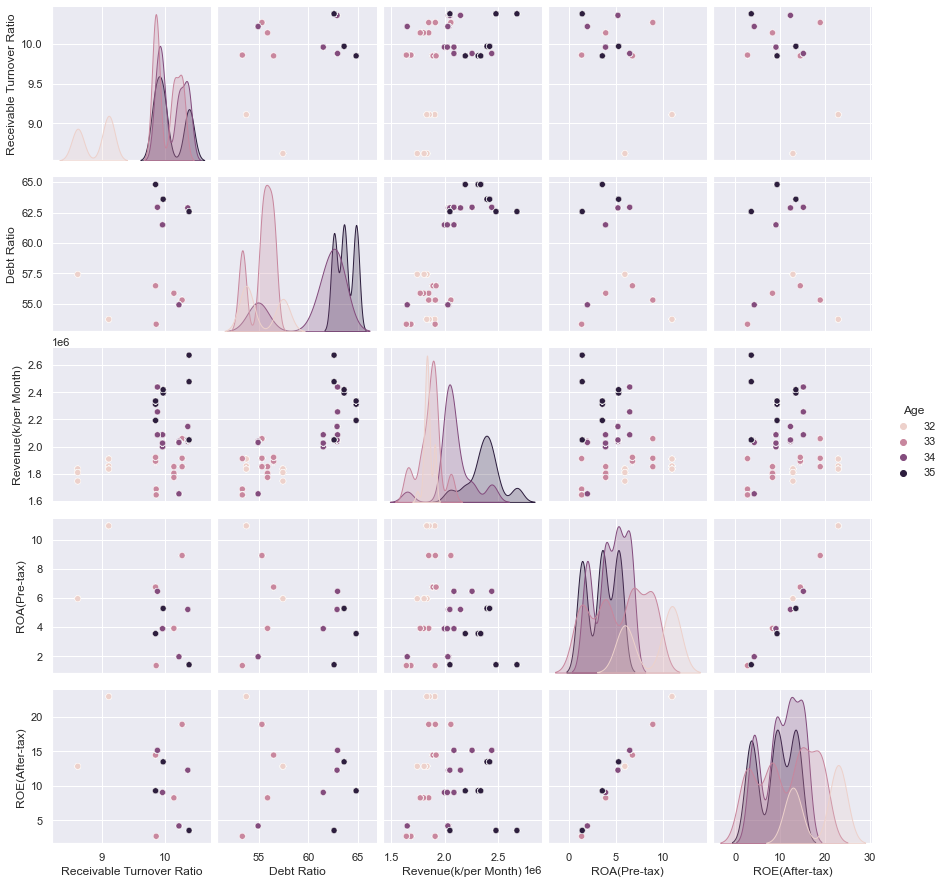

In [121]:
df0 = final[['Receivable Turnover Ratio', 'Debt Ratio', 'Revenue(k/per Month)','ROA(Pre-tax)','ROE(After-tax)','Age','SMB','HML','mkt-rf','t+3 CAR']]
sns.pairplot(df0[['Receivable Turnover Ratio', 'Debt Ratio', 'Revenue(k/per Month)','ROA(Pre-tax)','ROE(After-tax)','Age']], hue = 'Age')
sns.set_context({"figure.figsize":(10,8)})
plt.show()

<AxesSubplot:>

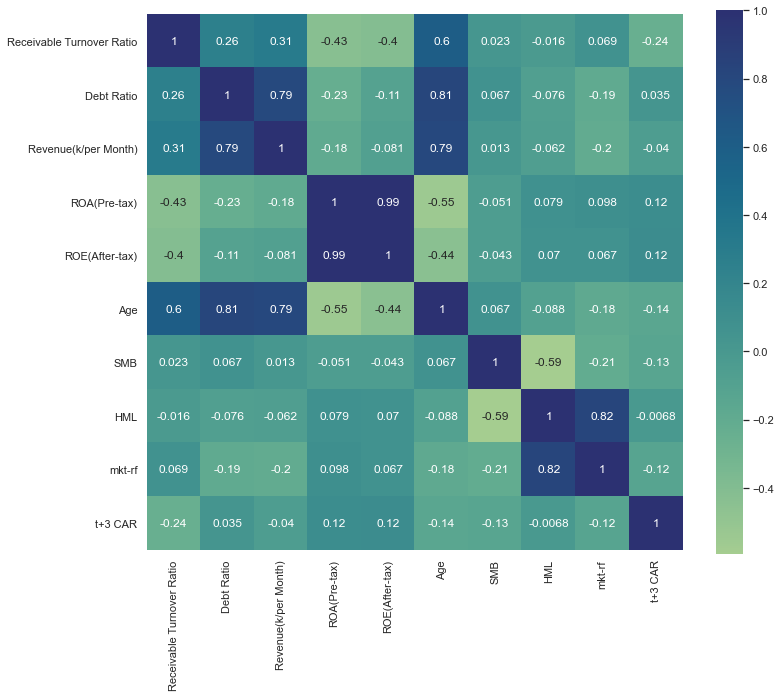

In [46]:
rdf0 = df0.corr()
sns.set(font_scale = 1.0)
sns.set_context({"figure.figsize":(12,10)})
sns.heatmap(data = rdf0, square = True, cmap = "crest", annot = True) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


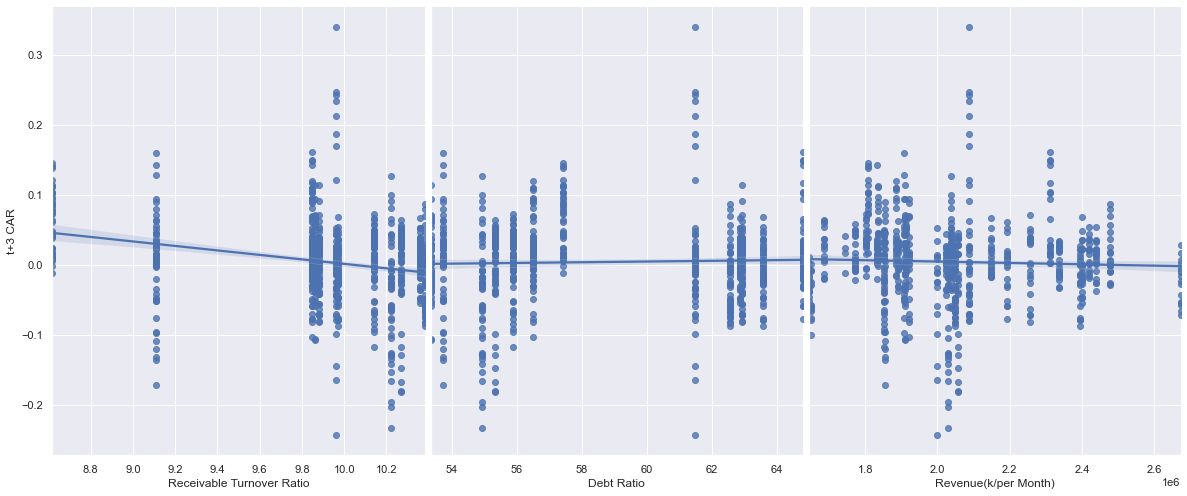

In [120]:
sns.pairplot(df0, x_vars = ['Receivable Turnover Ratio', 'Debt Ratio', 'Revenue(k/per Month)'], y_vars = 't+3 CAR', size=7, aspect=0.8, kind='reg')  
plt.show()